<a href="https://colab.research.google.com/github/skashyapsri/Applied-Mathematics-for-Engineers/blob/main/Probability_%26_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability and Statistics for Machine Learning

## Table of Contents
1. Introduction to Statistics
   - Mean/Median/Mode
   - Descriptive Statistics
   - Inferential Statistics
   - Hypothesis Testing
2. Probability Fundamentals
   - Simple Probability
   - Conditional Probability
   - Random Variables
   - Distributions
3. Practical Applications in ML

## Example 1.1: Student Heights


{'mean': 169.0, 'median': 169.5, 'mode': 170}

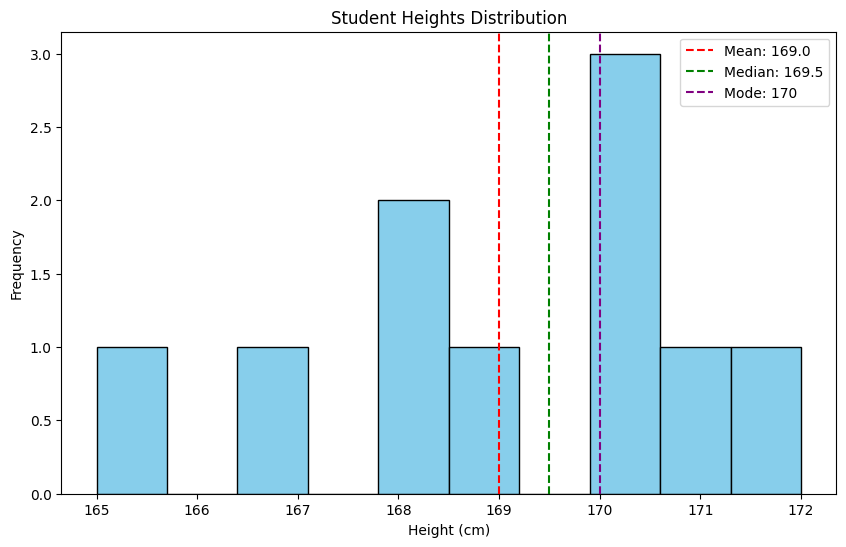

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_heights():
    """
    Analyze student heights in a class
    """
    heights = [165, 170, 168, 172, 169, 170, 171, 170, 168, 167]

    mean_height = np.mean(heights)
    median_height = np.median(heights)
    mode_height = max(set(heights), key=heights.count)

    plt.figure(figsize=(10, 6))
    plt.hist(heights, bins=10, color='skyblue', edgecolor='black')
    plt.axvline(mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.1f}')
    plt.axvline(median_height, color='green', linestyle='--', label=f'Median: {median_height:.1f}')
    plt.axvline(mode_height, color='purple', linestyle='--', label=f'Mode: {mode_height}')

    plt.title('Student Heights Distribution')
    plt.xlabel('Height (cm)')
    plt.ylabel('Frequency')
    plt.legend()

    return {
        'mean': mean_height,
        'median': median_height,
        'mode': mode_height
    }
analyze_heights()

## Exercise 1.1
Calculate mean, median, and mode for a dataset of student exam scores. Which measure best represents the "typical" score? Why?


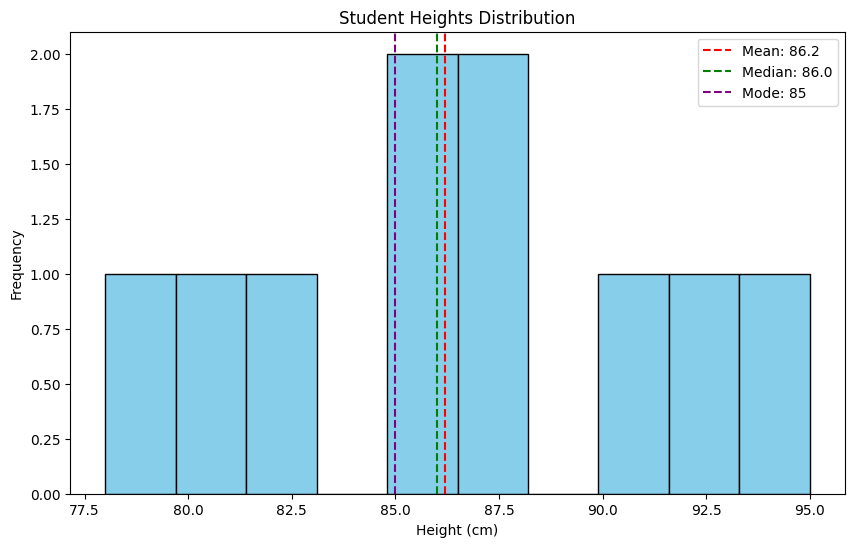

Mean score: 86.20
Median score: 86.00
Mode score: 85


In [ ]:
import numpy as np
from collections import Counter

def analyze_exam_scores(scores):
  """
  Calculates the mean, median, and mode of a dataset of exam scores.
  """
  mean_score = np.mean(scores)
  median_score = np.median(scores)

  # Calculate mode using Counter
  counts = Counter(scores)
  mode_score = counts.most_common(1)[0][0] if counts else None

  plt.figure(figsize=(10, 6))
  plt.hist(scores, bins=10, color='skyblue', edgecolor='black')
  plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.1f}')
  plt.axvline(median_score, color='green', linestyle='--', label=f'Median: {median_score:.1f}')
  plt.axvline(mode_score, color='purple', linestyle='--', label=f'Mode: {mode_score}')

  plt.title('Student Heights Distribution')
  plt.xlabel('Height (cm)')
  plt.ylabel('Frequency')
  plt.legend()

  plt.show()

  return mean_score, median_score, mode_score

# Example dataset of student exam scores
exam_scores = [85, 90, 78, 88, 92, 85, 80, 87, 95, 82]

mean, median, mode = analyze_exam_scores(exam_scores)

print(f"Mean score: {mean:.2f}")
print(f"Median score: {median:.2f}")
print(f"Mode score: {mode}")
#

## Real-World Application 1.1: Customer Purchase Analysis


In [ ]:
from scipy import stats
def analyze_customer_purchases(purchases):
    """
    Analyze customer purchase amounts
    """
    def calculate_metrics(data):
        return {
            'mean': np.mean(data),
            'median': np.median(data),
            'mode': max(set(data), key=data.count),
            'skewness': stats.skew(data)
        }

    metrics = calculate_metrics(purchases)

    print(f"Average purchase: ${metrics['mean']:.2f}")
    print(f"Median purchase: ${metrics['median']:.2f}")
    print(f"Most common purchase: ${metrics['mode']:.2f}")
    print(f"Distribution skewness: {metrics['skewness']:.2f}")

    plt.figure(figsize=(10, 6))
    plt.hist(purchases, bins=30, density=True, alpha=0.7)
    plt.title('Distribution of Customer Purchases')
    plt.xlabel('Purchase Amount ($)')
    plt.ylabel('Frequency')

    return metrics

Average purchase: $28.00
Median purchase: $30.00
Most common purchase: $30.00
Distribution skewness: -0.14


{'mean': 28.0, 'median': 30.0, 'mode': 30, 'skewness': -0.14294395710163513}

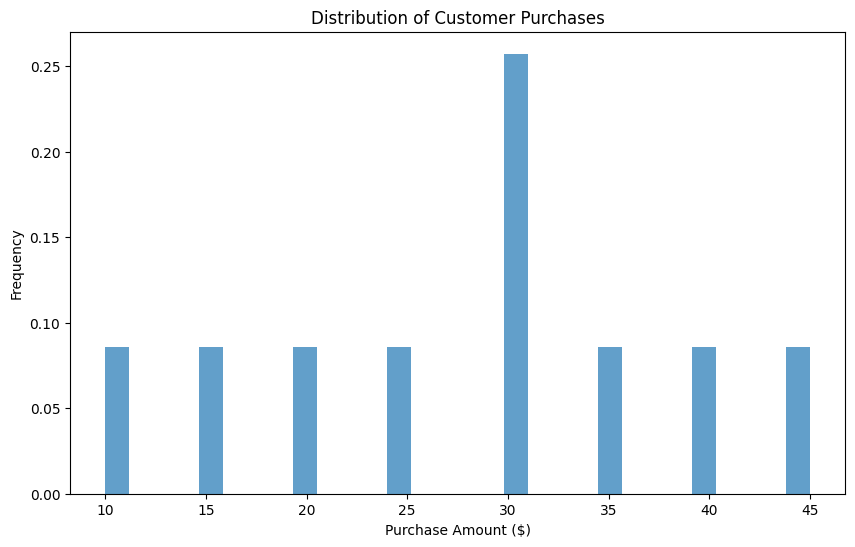

In [ ]:
analyze_customer_purchases(purchases = [10, 15, 20, 25, 30, 30, 30, 35, 40, 45])

## Example 1.3: Sample Mean Analysis

In [ ]:
  def demonstrate_sampling_distribution():
      """
      Demonstrate the Central Limit Theorem
      """
      # Generate population data (non-normal distribution)
      population = np.random.exponential(scale=2.0, size=10000)

      # Take multiple samples and calculate means
      sample_size = 30
      num_samples = 1000
      sample_means = []

      for _ in range(num_samples):
          sample = np.random.choice(population, size=sample_size)
          sample_means.append(np.mean(sample))

      # Plot distributions
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

      # Population distribution
      ax1.hist(population, bins=50, density=True, alpha=0.7)
      ax1.set_title('Population Distribution (Exponential)')

      # Sampling distribution
      ax2.hist(sample_means, bins=50, density=True, alpha=0.7)
      ax2.set_title('Sampling Distribution of Mean')

      # Add normal curve to sampling distribution
      x = np.linspace(min(sample_means), max(sample_means), 100)
      y = stats.norm.pdf(x, np.mean(sample_means), np.std(sample_means))
      ax2.plot(x, y, 'r-', lw=2)

      return {
          'population_mean': np.mean(population),
          'sample_means_mean': np.mean(sample_means),
          'population_std': np.std(population),
          'sample_means_std': np.std(sample_means)
      }

{'population_mean': 2.0078778816073974,
 'sample_means_mean': 2.0085744450788523,
 'population_std': 2.0377292495179407,
 'sample_means_std': 0.3706226355582097}

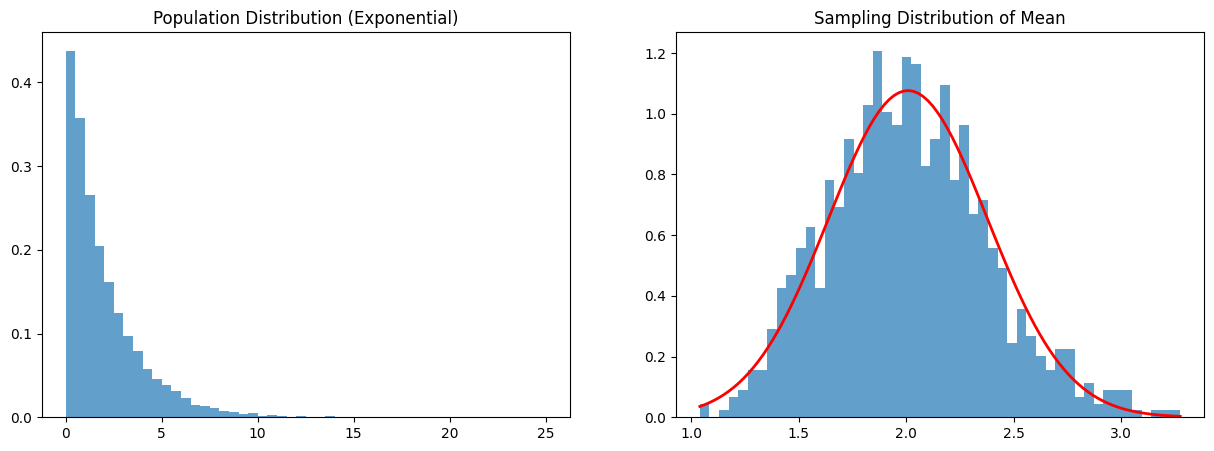

In [ ]:
demonstrate_sampling_distribution()

## Example 2.1: Card Drawing Probability

In [ ]:
def card_probability_demo():
    """
    Demonstrate basic probability with card drawing
    """
    def calculate_probability(event_condition, num_trials=10000):
        successes = 0
        deck = list(range(52))  # 0-12: Hearts, 13-25: Diamonds, etc.

        for _ in range(num_trials):
            np.random.shuffle(deck)
            drawn_card = deck[0]
            if event_condition(drawn_card):
                successes += 1

        return successes / num_trials

    # Example probabilities
    face_card_prob = calculate_probability(
        lambda x: x % 13 in [10, 11, 12]
    )
    heart_prob = calculate_probability(
        lambda x: x < 13
    )

    print(f"Probability of drawing a face card: {face_card_prob:.3f}")
    print(f"Probability of drawing a heart: {heart_prob:.3f}")

    return {
        'face_card_prob': face_card_prob,
        'heart_prob': heart_prob
    }
card_probability_demo()

Probability of drawing a face card: 0.239
Probability of drawing a heart: 0.251


{'face_card_prob': 0.2386, 'heart_prob': 0.2508}

## Example 2.2: Email Spam Detection

In [ ]:
def spam_detection_example():
    """
    Demonstrate conditional probability in spam detection
    """
    # Sample data
    spam_words = {
        'money': {'spam': 0.3, 'not_spam': 0.05},
        'winner': {'spam': 0.2, 'not_spam': 0.02},
        'free': {'spam': 0.4, 'not_spam': 0.1}
    }

    prior_spam = 0.3  # P(spam)

    def calculate_spam_probability(message):
        words = message.lower().split()

        # Calculate likelihood using naive Bayes
        likelihood_spam = 1
        likelihood_not_spam = 1

        for word in words:
            if word in spam_words:
                likelihood_spam *= spam_words[word]['spam']
                likelihood_not_spam *= spam_words[word]['not_spam']

        # Calculate posterior probability using Bayes' theorem
        numerator = likelihood_spam * prior_spam
        denominator = (likelihood_spam * prior_spam +
                      likelihood_not_spam * (1 - prior_spam))

        return numerator / denominator if denominator != 0 else 0

    # Test the model
    test_messages = [
        "You are a winner! Free money now!",
        "Meeting at noon tomorrow",
        "Free workshop on data science"
    ]

    results = {}
    for msg in test_messages:
        prob = calculate_spam_probability(msg)
        results[msg] = prob
        print(f"Message: {msg}")
        print(f"Probability of spam: {prob:.2%}\n")

    return results

In [ ]:
spam_detection_example()

Message: You are a winner! Free money now!
Probability of spam: 91.14%

Message: Meeting at noon tomorrow
Probability of spam: 30.00%

Message: Free workshop on data science
Probability of spam: 63.16%



{'You are a winner! Free money now!': 0.9113924050632911,
 'Meeting at noon tomorrow': 0.3,
 'Free workshop on data science': 0.631578947368421}

## Exercise 2.2


In [ ]:
import numpy as np

# Define prior probabilities for diseases
disease_priors = {
    'Flu': 0.2,
    'Cold': 0.3,
    'Allergies': 0.5,
}

# Define symptom likelihoods for each disease
symptom_likelihoods = {
    'Fever': {
        'Flu': 0.8,
        'Cold': 0.2,
        'Allergies': 0.1,
    },
    'Cough': {
        'Flu': 0.7,
        'Cold': 0.6,
        'Allergies': 0.2,
    },
    'RunnyNose': {
        'Flu': 0.3,
        'Cold': 0.7,
        'Allergies': 0.9,
    },
    'Sneezing': {
        'Flu': 0.2,
        'Cold': 0.3,
        'Allergies': 0.8,
    },
}

def calculate_posterior_probability(symptoms):
  """Calculates posterior probabilities for each disease given symptoms."""

  posterior_probabilities = {}
  for disease in disease_priors:
    posterior_probability = disease_priors[disease]  # Start with prior

    for symptom in symptoms:
      if symptom in symptom_likelihoods:
        posterior_probability *= symptom_likelihoods[symptom].get(disease, 0.01)
        # Use a small value to avoid zero probability if a symptom is not likely for a specific disease

    posterior_probabilities[disease] = posterior_probability

  # Normalize posterior probabilities
  total_probability = sum(posterior_probabilities.values())
  for disease in posterior_probabilities:
    posterior_probabilities[disease] /= total_probability

  return posterior_probabilities

# Example usage
symptoms = ['Fever', 'Cough']
posterior_probabilities = calculate_posterior_probability(symptoms)

print("Posterior probabilities given symptoms:", posterior_probabilities)

# Get the most likely disease
most_likely_disease = max(posterior_probabilities, key=posterior_probabilities.get)
print("Most likely disease:", most_likely_disease)


Posterior probabilities given symptoms: {'Flu': 0.3555555555555556, 'Cold': 0.19999999999999996, 'Allergies': 0.4444444444444445}
Most likely disease: Allergies


## Real-World Application 2.2: Customer Purchase Prediction


In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)  # For reproducibility

# Generate synthetic data
n_customers = 1000

# Create base data with some realistic patterns
data = pd.DataFrame({
    'visited': np.random.choice([True, False], size=n_customers, p=[0.7, 0.3]),
    'abandoned': np.random.choice([True, False], size=n_customers, p=[0.4, 0.6]),
    'previous': np.random.choice([True, False], size=n_customers, p=[0.3, 0.7])
})

# Create purchase data with realistic correlations
def generate_purchase_probability(row):
    prob = 0.2  # base probability

    if row['visited']:
        prob += 0.3
    if not row['abandoned']:
        prob += 0.25
    if row['previous']:
        prob += 0.35

    return min(prob, 0.95)  # cap at 95%

data['purchase_prob'] = data.apply(generate_purchase_probability, axis=1)
data['purchased'] = data['purchase_prob'].apply(lambda x: np.random.choice([True, False], p=[x, 1-x]))

# Remove the temporary probability column
data = data.drop('purchase_prob', axis=1)

# Print some sample data
print("Sample of the generated data:")
print(data.head())

print("\nData distribution:")
print(data.mean())

# Test case for a new customer
new_customer = {
    'visited_website': True,
    'cart_abandonment': False,
    'previous_customer': True
}

# Calculate probabilities using the original function
probabilities = customer_purchase_prediction(data)

# Make prediction
prediction = predict_purchase(new_customer, probabilities)

print("\nPrediction for test customer:", prediction)

# Verification statistics
print("\nConditional probabilities:")
for factor, values in probabilities.items():
    print(f"\n{factor}:")
    for condition, prob in values.items():
        print(f"  When {condition}: {prob:.2%}")

Sample of the generated data:
   visited  abandoned  previous  purchased
0     True       True      True       True
1    False      False      True       True
2    False      False     False       True
3     True      False      True       True
4     True      False      True       True

Data distribution:
visited      0.712
abandoned    0.385
previous     0.298
purchased    0.680
dtype: float64

Prediction for test customer: 0.49945213453718135

Conditional probabilities:

visited_website:
  When True: 75.14%
  When False: 50.35%

cart_abandonment:
  When True: 53.51%
  When False: 77.07%

previous_customer:
  When True: 86.24%
  When False: 60.26%


## Example 2.3: Stock Returns Analysis


In [ ]:
def analyze_stock_returns():
    """
    Analyze stock returns as random variables
    """
    # Generate sample daily returns
    returns = np.random.normal(0.001, 0.02, 1000)  # 1000 days

    # Calculate statistics
    expected_return = np.mean(returns)
    volatility = np.std(returns)

    # Calculate probability of loss
    prob_loss = np.mean(returns < 0)

    plt.figure(figsize=(12, 6))

    # Returns distribution
    plt.subplot(1, 2, 1)
    plt.hist(returns, bins=50, density=True, alpha=0.7)
    plt.title('Distribution of Returns')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')

    # Add normal curve
    x = np.linspace(min(returns), max(returns), 100)
    plt.plot(x, stats.norm.pdf(x, expected_return, volatility))

    # Cumulative returns
    plt.subplot(1, 2, 2)
    cumulative_returns = np.cumprod(1 + returns)
    plt.plot(cumulative_returns)
    plt.title('Cumulative Returns')
    plt.xlabel('Days')
    plt.ylabel('Value')

    return {
        'expected_return': expected_return,
        'volatility': volatility,
        'prob_loss': prob_loss
    }

{'expected_return': 0.0009457447573335254,
 'volatility': 0.020403171444036347,
 'prob_loss': 0.483}

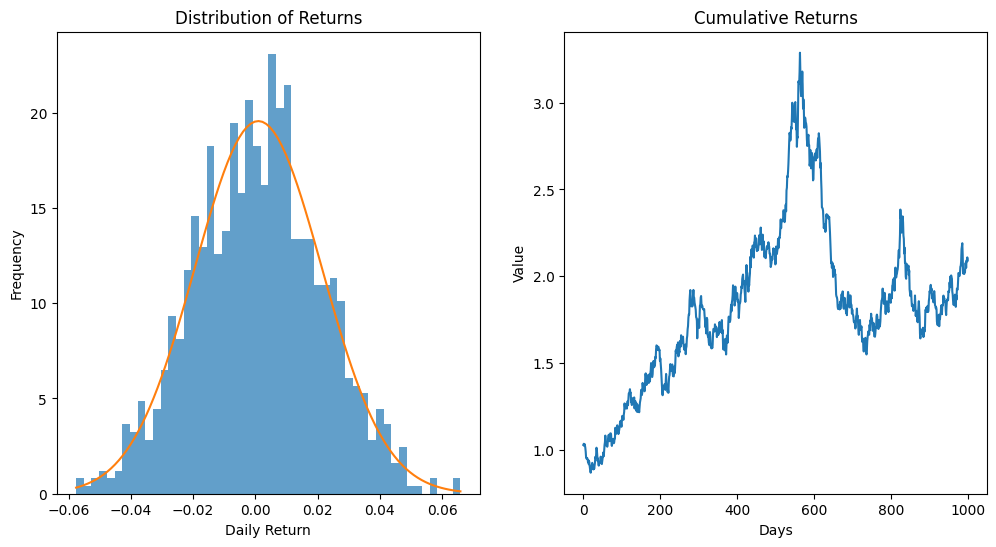

In [ ]:
analyze_stock_returns()

## Exercise 2.3
Analyze student exam scores as random variables:

1. Calculate expected value and variance

2. Find probability of passing (score > 60)

3. Simulate final grades based on multiple exams


In [ ]:
def analyze_student_exam_scores(scores):
  """
  Analyzes student exam scores as random variables.

  Args:
    scores: A list of exam scores.

  Returns:
    A dictionary containing the expected value, variance, probability of passing,
    and simulated final grades.
  """

  # Calculate expected value (mean) and variance
  expected_value = np.mean(scores)
  variance = np.var(scores)

  # Calculate the probability of passing (score > 60)
  passing_probability = np.mean([score > 60 for score in scores])

  # Simulate final grades based on multiple exams
  num_exams = 5
  num_students = len(scores)
  simulated_final_grades = []

  for _ in range(num_students):
    exam_grades = np.random.choice(scores, size=num_exams)
    final_grade = np.mean(exam_grades)
    simulated_final_grades.append(final_grade)

  return {
      "expected_value": expected_value,
      "variance": variance,
      "passing_probability": passing_probability,
      "simulated_final_grades": simulated_final_grades,
  }


# Example usage:
exam_scores = [75, 80, 85, 90, 95, 60, 70, 82, 88, 92]
analysis_results = analyze_student_exam_scores(exam_scores)

print("Expected value (mean):", analysis_results["expected_value"])
print("Variance:", analysis_results["variance"])
print("Probability of passing:", analysis_results["passing_probability"])
print("Simulated final grades:", analysis_results["simulated_final_grades"])

Expected value (mean): 81.7
Variance: 105.80999999999999
Probability of passing: 0.9
Simulated final grades: [89.0, 83.0, 89.0, 84.6, 85.8, 87.4, 82.8, 82.0, 85.0, 81.0]
